# Example notebook `neuralib.segmentation`

- Wrapper for [stardist](https://github.com/stardist/stardist) and [cellpose](https://github.com/MouseLand/cellpose)
- Below example use api call from the source code, however, cli call are recommended, see the [Doc](https://neuralib.readthedocs.io/en/latest/api/neuralib.segmentation.html#module-neuralib.segmentation)

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from neuralib.io.dataset import load_example_rois_image
from neuralib.segmentation.cellpose.run_api import CellPoseAPIOption, CellPoseEvalResult
from neuralib.segmentation.stardist.run_2d import StarDist2DOptions, StarDistResult

### Example of Run StarDist model
- See [Doc](https://neuralib.readthedocs.io/en/latest/api/neuralib.segmentation.stardist.html#module-neuralib.segmentation.stardist)

In [2]:
# download example image
img = load_example_rois_image()
tmp = Path('test.png')
plt.imsave(tmp, img)

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


 IO       [2024-09-26 23:51:35,854] [run_2d.py]  save stardist results to test.npz
IO:run_2d.py:save stardist results to test.npz
 IO       [2024-09-26 23:51:35,855] [run_2d.py]  Load stardist results from test.npz
IO:run_2d.py:Load stardist results from test.npz


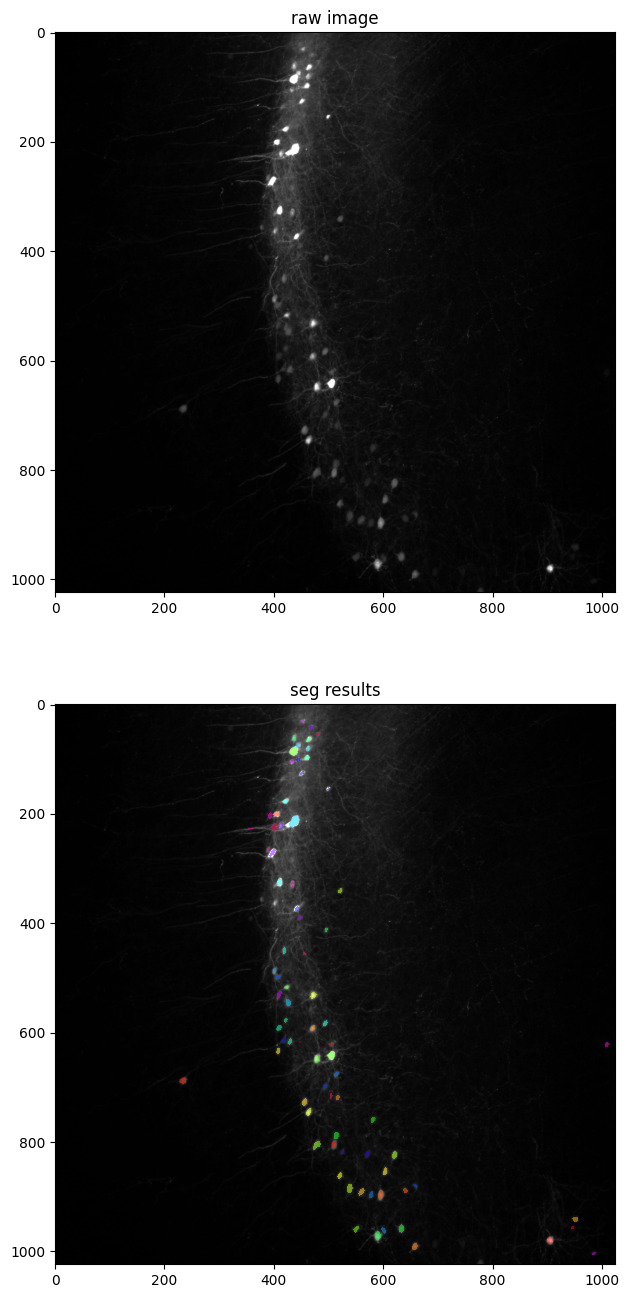

In [3]:
class TestStarDistOptions(StarDist2DOptions):
    file = tmp
    model = '2D_versatile_fluo'


opt_sd = TestStarDistOptions()
opt_sd.eval()
res = StarDistResult.load(opt_sd.seg_output(tmp))

_, ax = plt.subplots(2, 1, figsize=(16, 16))
ax[0].imshow(opt_sd.process_image(), cmap='gray')
ax[0].set_title('raw image')

ax[1].imshow(opt_sd.process_image(), cmap='gray')
ax[1].imshow(res.labels, cmap='hsv', alpha=0.5)
ax[1].set_title('seg results')
plt.show()


### Example of Run Cellpose model
- See [Doc](https://neuralib.readthedocs.io/en/latest/api/neuralib.segmentation.stardist.html#module-neuralib.segmentation.stardist)

[PASS][24-09-26 23:51:39] - MPS is available using backend: torch

loading model for chan2: denoise_nuclei


resnet_torch.py (280): You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


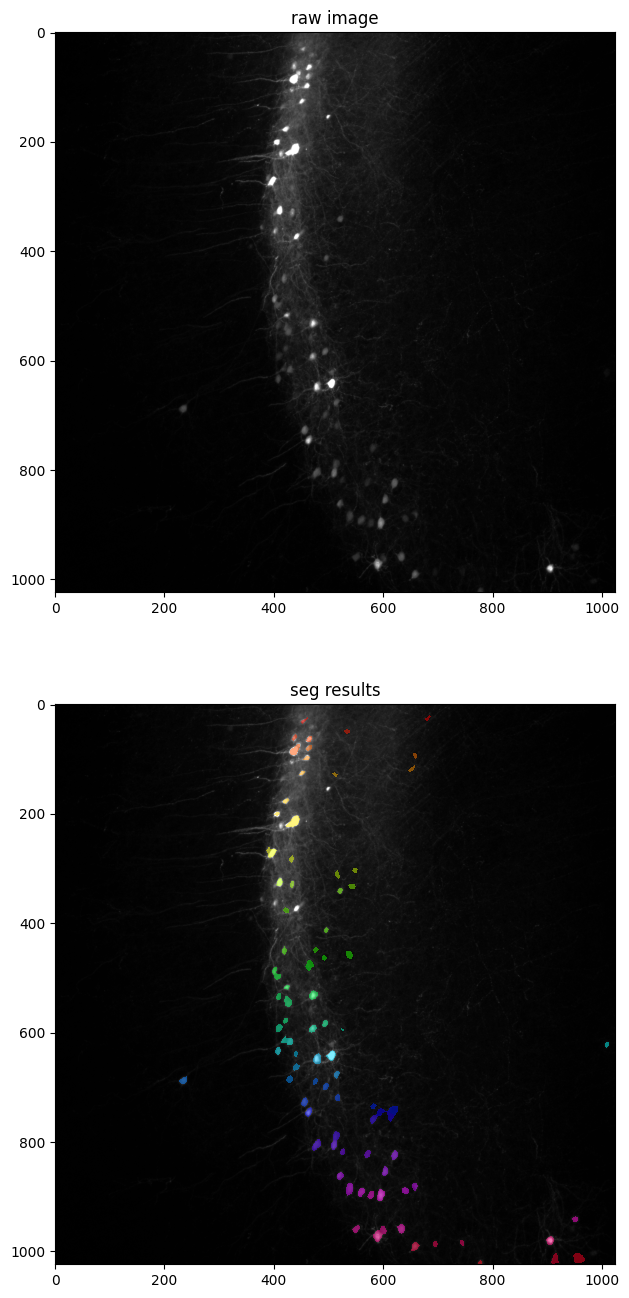

In [4]:
class TestCellPoseOptions(CellPoseAPIOption):
    file = tmp
    model = 'cyto3'
    diameter = 20


opt_cp = TestCellPoseOptions()
opt_cp.eval()
res = CellPoseEvalResult.load(opt_cp.seg_output(tmp))

_, ax = plt.subplots(2, 1, figsize=(16, 16))
ax[0].imshow(opt_cp.process_image(), cmap='gray')
ax[0].set_title('raw image')

ax[1].imshow(opt_cp.process_image(), cmap='gray')
ax[1].imshow(res.nan_masks(), cmap='hsv', alpha=0.5)
ax[1].set_title('seg results')
plt.show()

In [5]:
# clean the example dataset and output
tmp.unlink()
opt_sd.seg_output(tmp).unlink()
opt_cp.seg_output(tmp).unlink()